In [9]:
import matplotlib.pyplot as plt

# 2.a

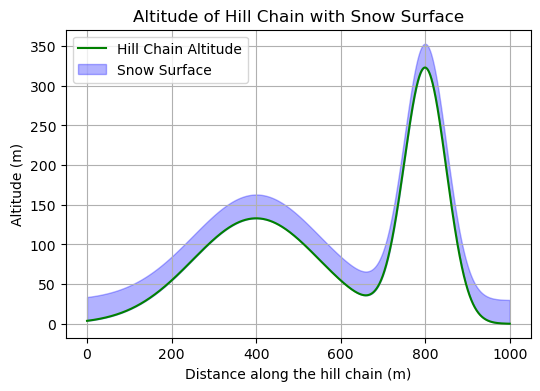

In [21]:
# A simple test: this should display a chain with 2 hills with altitude
# approx. 130 and 320 metres, and a uniform +30 metres of snow on top
importlib.reload(task2);
L, N = 1000, 2**12 + 1

H = [50000, 40000]
mu = [400, 800]
sig = [150, 50]
params = np.array([H, mu, sig])

x = np.linspace(0, L, N)
snow_depth = 30*np.ones(N)

r = task2.create_hills(x, params)
fig, ax = task2.plot_hills(x, r, snow_depth)
plt.show()

# 2.d

In [86]:
importlib.reload(task2);

# Using the same example values as in 2.b
params = np.loadtxt('params_2d.txt')
snow_depth = np.loadtxt('snow_2d.txt')

estimates = task2.spaced_estimates(snow_depth, params, L)
print(estimates)

[[19981.39386068 19981.6926791  19982.28767389 19983.46709608
  19985.7836842  19990.24804873 19998.50497768]
 [19981.0937212  19981.09240015 19981.08711598 19981.06598025
  19980.98145254 19980.64358542 19979.29605105]]


Slope for Left Riemann Sum: 0.9610788711782774
Slope for Composite Trapezoid Rule: 1.9990775727204608


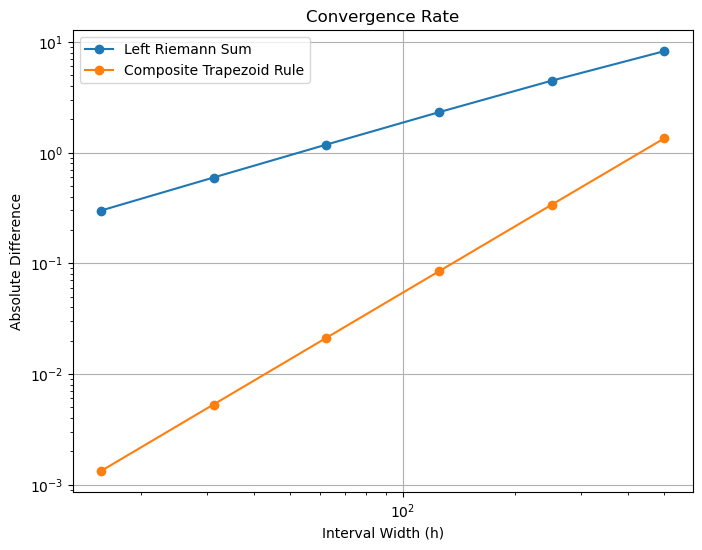

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the absolute difference between consecutive estimates
diff_riemann = np.abs(np.diff(estimates[0]))
diff_trapezoid = np.abs(np.diff(estimates[1]))

# Calculate h values
h_values = L / (2 ** np.arange(6, 0, -1))

# Fit a straight line to the data and find the slope
slope_riemann, _ = np.polyfit(np.log(h_values), np.log(diff_riemann), 1)
slope_trapezoid, _ = np.polyfit(np.log(h_values), np.log(diff_trapezoid), 1)

# Print the slopes
print(f'Slope for Left Riemann Sum: {slope_riemann}')
print(f'Slope for Composite Trapezoid Rule: {slope_trapezoid}')

# Plot the absolute differences in a log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(h_values, diff_riemann, marker='o', linestyle='-', label='Left Riemann Sum')
plt.loglog(h_values, diff_trapezoid, marker='o', linestyle='-', label='Composite Trapezoid Rule')
plt.xlabel('Interval Width (h)')
plt.ylabel('Absolute Difference')
plt.title('Convergence Rate')
plt.legend()
plt.grid(True)
plt.show()


In [152]:
from IPython.display import Markdown

Markdown(r"""
The log-log graph for the composite trapezoid rule has a slope of 2, which means that when the size of the intervals is doubled (i.e. $M$ is halved), the error increases by a factor of 4:

$$
\log(\text{err}) = 2 \log(h) + \beta = \log(h^2) + \beta = \log(\alpha h^2),
$$

where $\alpha = e^{\beta}$ is some constant. Then, taking the exponential on both sides,

$$
\text{err} = \alpha h^2.
$$

This is evidence that the rate of convergence for this method is $r=2$.
""")



The log-log graph for the composite trapezoid rule has a slope of 2, which means that when the size of the intervals is doubled (i.e. $M$ is halved), the error increases by a factor of 4:

$$
\log(\text{err}) = 2 \log(h) + \beta = \log(h^2) + \beta = \log(\alpha h^2),
$$

where $\alpha = e^{\beta}$ is some constant. Then, taking the exponential on both sides,

$$
\text{err} = \alpha h^2.
$$

This is evidence that the rate of convergence for this method is $r=2$.


In [97]:
from IPython.display import Markdown



Markdown(r"""
A similar analysis can be found for the Left Riemann Sum method, which has a slope of nearly $1$ in a log-log graph. We'll use the same equation:

$$
\log(\text{err}) = m \log(h) + \beta,
$$

where $m$ is the slope. For the Left Riemann Sum, $m \approx 1$. Thus, the equation becomes:

$$
\log(\text{err}) = \log(h) + \beta.
$$

Then, taking the exponential on both sides:

$$
\text{err} = e^{\beta} \cdot h.
$$

This confirms that the rate of convergence for the Left Riemann Sum method is approximately $1$, as the error grows linearly with the size of the intervals.


""")



A similar analysis can be found for the Left Riemann Sum method, which has a slope of nearly $1$ in a log-log graph. We'll use the same equation:

$$
\log(\text{err}) = m \log(h) + \beta,
$$

where $m$ is the slope. For the Left Riemann Sum, $m \approx 1$. Thus, the equation becomes:

$$
\log(\text{err}) = \log(h) + \beta.
$$

Then, taking the exponential on both sides:

$$
\text{err} = e^{\beta} \cdot h.
$$

This confirms that the rate of convergence for the Left Riemann Sum method is approximately $1$, as the error grows linearly with the size of the intervals.




# 3.a

In [112]:
from IPython.display import Markdown

Markdown(r"""


In the following log-log plot, we  observe that,  for sufficiently large $n$, we have $|E_n| \sim \frac{1}{2n}$;
    
""""" )   




In the following log-log plot, we  observe that,  for sufficiently large $n$, we have $|E_n| \sim \frac{1}{2n}$;
    


In [54]:
import numpy as np

def gamma_error_1(n_max):
    gamma = 0.5772156649015329
    H_n = np.cumsum(1 / np.arange(1, n_max + 1))
    E_n = H_n - np.log(np.arange(1, n_max + 1)) - gamma
    return E_n


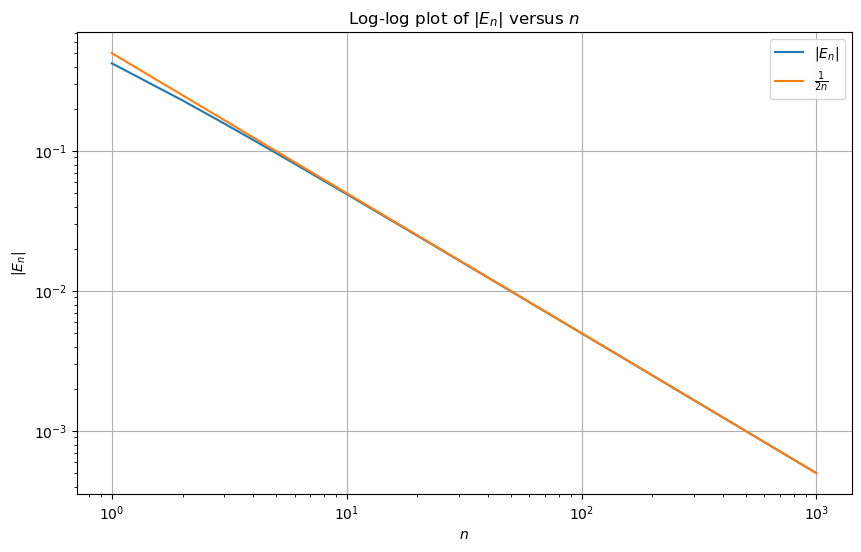

In [57]:
import matplotlib.pyplot as plt

n_max = 1000
n_values = np.arange(1, n_max + 1)
E_n_values = np.abs(gamma_error_1(n_max))
half_inverse_n = 0.5 / n_values

plt.figure(figsize=(10, 6))
plt.loglog(n_values,E_n_values, label=r'$|E_n|$')
plt.loglog(n_values,   half_inverse_n, label=r'$\frac{1}{2n}$')
plt.xlabel('$n$')
plt.ylabel('$|E_n|$')
plt.title('Log-log plot of $|E_{n}|$ versus $n$')
plt.legend()
plt.grid(True)
plt.show()


# 3.b

In [130]:

from IPython.display import Markdown

Markdown(r"""


Now, we observe that the plot of $\frac{1}{2n}$ no longer aligns with the error $|E_{2, n}|$. In fact, for sufficiently large $n$, we now have $E_{2, n} \sim \frac{1}{12n^2}$  

We see that the curve of $E_{2, n}$ overlaps with the curve of $\frac{1}{12n^2}$
"""""  )




Now, we observe that the plot of $\frac{1}{2n}$ no longer aligns with the error $|E_{2, n}|$. In fact, for sufficiently large $n$, we now have $E_{2, n} \sim \frac{1}{12n^2}$  

We see that the curve of $E_{2, n}$ overlaps with the curve of $\frac{1}{12n^2}$


In [146]:
def gamma_error_2(n_max):
    gamma = 0.5772156649015329
    H_n = np.cumsum(1 / np.arange(1, n_max + 1))
    inverse_n = 1 / np.arange(1, n_max + 1)
    E_2_n = H_n - np.log(np.arange(1, n_max + 1)) - gamma - 0.5 * inverse_n
    return E_2_n


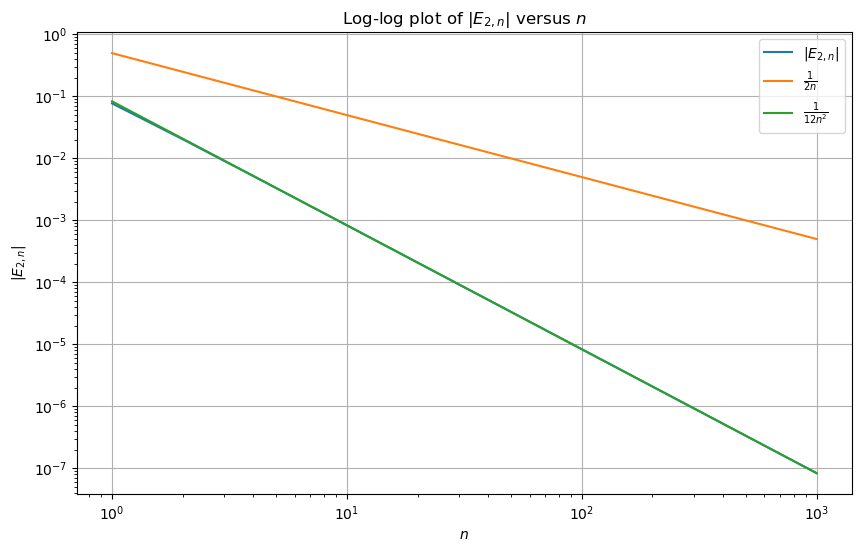

In [147]:
n_max = 1000
n_values = np.arange(1, n_max + 1)
E_2_n_values = np.abs(gamma_error_2(n_max))
half_inverse_n = 0.5 / n_values
inverse_12_n_squared = 1 / (12 * n_values ** 2)

plt.figure(figsize=(10, 6))
plt.loglog(n_values, E_2_n_values, label=r'$|E_{2, n}|$')
plt.loglog(n_values, half_inverse_n, label=r'$\frac{1}{2n}$')
plt.loglog(n_values, inverse_12_n_squared, label=r'$\frac{1}{12n^2}$')
plt.xlabel('$n$')
plt.ylabel('$|E_{2, n}|$')
plt.title('Log-log plot of $|E_{2, n}|$ versus $n$')
plt.legend()
plt.grid(True)
plt.show()



# 3d

In [68]:
from scipy.special import bernoulli

In [66]:
def gamma_error(k, n_max):
    gamma = 0.5772156649015329
    H_n = np.cumsum(1 / np.arange(1, n_max + 1))
    inverse_n = 1 / np.arange(1, n_max + 1)
    bernoulli_coeffs = bernoulli(2*k)
    E_k_n = H_n - np.log(np.arange(1, n_max + 1)) - gamma
    for j in range(1, k+1):
        E_k_n += bernoulli_coeffs[2*j] / (j * np.power(np.arange(1, n_max + 1), j))
    return E_k_n


In [144]:
from IPython.display import Markdown

Markdown(r"""

In the following plot, we observe that for increasing values of $k$ the error $|E_{k, n}|$ decreases more rapidly as  $n$ increases. This is because higher-order corrections involving Bernoulli numbers provide better approximations to the Euler constant
$\gamma$.Therefore, for larger $k$, the error converges faster to zero as $n$ grows indicating that the approximation improves with larger $n$. To compute an approximation of $\gamma$ accurate to within $10^{-7}$, 
 we could use a sufficiently large $n$ and a high order $k$. By increasing the value of $n$, we are summing more terms of the harmonic series, thus getting a more accurate approximation. Similarly, increasing the order $k$ of the terms involved in the difference between the harmonic series and the natural logarithm helps refine the approximation.

"""""  )




In the following plot, we observe that for increasing values of $k$ the error $|E_{k, n}|$ decreases more rapidly as  $n$ increases. This is because higher-order corrections involving Bernoulli numbers provide better approximations to the Euler constant
$\gamma$.Therefore, for larger $k$, the error converges faster to zero as $n$ grows indicating that the approximation improves with larger $n$. To compute an approximation of $\gamma$ accurate to within $10^{-7}$, 
 we could use a sufficiently large $n$ and a high order $k$. By increasing the value of $n$, we are summing more terms of the harmonic series, thus getting a more accurate approximation. Similarly, increasing the order $k$ of the terms involved in the difference between the harmonic series and the natural logarithm helps refine the approximation.



C:\Users\Tushar Chandel\AppData\Local\Temp\ipykernel_10216\1207734515.py:8: RuntimeWarning: divide by zero encountered in divide
  E_k_n += bernoulli_coeffs[2*j] / (j * np.power(np.arange(1, n_max + 1), j))
C:\Users\Tushar Chandel\AppData\Local\Temp\ipykernel_10216\1207734515.py:8: RuntimeWarning: invalid value encountered in add
  E_k_n += bernoulli_coeffs[2*j] / (j * np.power(np.arange(1, n_max + 1), j))


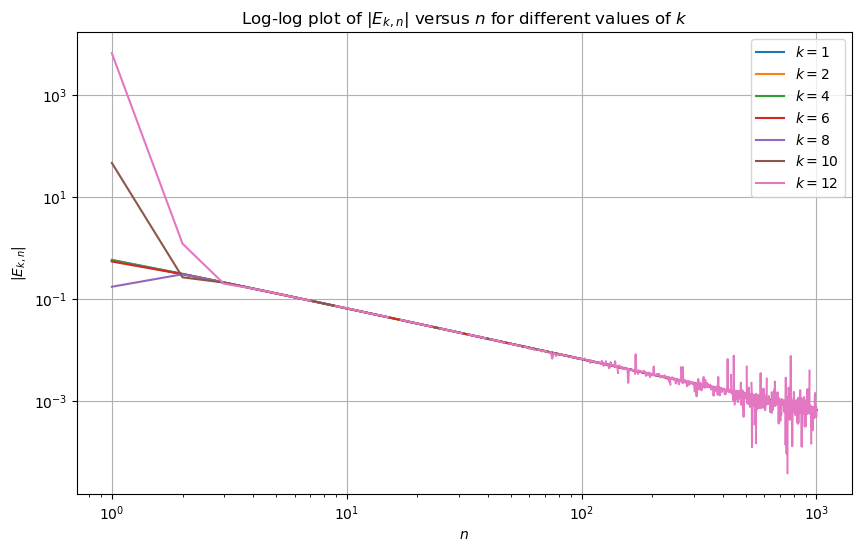

In [69]:
n_max = 1000
ks = [1, 2, 4, 6, 8, 10, 12]
plt.figure(figsize=(10, 6))

for k in ks:
    E_k_n_values = np.abs(gamma_error(k, n_max))
    plt.loglog(np.arange(1, n_max + 1), E_k_n_values, label=f'$k = {k}$')

plt.xlabel('$n$')
plt.ylabel('$|E_{k, n}|$')
plt.title('Log-log plot of $|E_{k, n}|$ versus $n$ for different values of $k$')
plt.legend()
plt.grid(True)
plt.show()
